In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns



Summary Statistics:
            count      mean       std  min  max
Timepoint                                     
TIME1         36  4.055556  0.892651  2.0  5.0
TIME2         30  3.400000  1.037238  1.0  5.0
TIME3         20  3.350000  0.933302  1.0  5.0
TIME4         25  2.920000  0.996661  1.0  5.0
TIME5         20  2.950000  1.050063  1.0  5.0

ANOVA Test Results:
F-statistic: 6.6206, p-value: 0.000072

Pairwise T-Test Results:
TIME1 vs TIME2: p-value = 0.008565 (✅ Significant)
TIME2 vs TIME3: p-value = 0.859992 (❌ Not Significant)
TIME3 vs TIME4: p-value = 0.143720 (❌ Not Significant)
TIME4 vs TIME5: p-value = 0.922895 (❌ Not Significant)

Overall Trend (TIME1 vs TIME5):
TIME1 vs TIME5: t-stat = 3.9773, p-value = 0.000342 (✅ Significant)


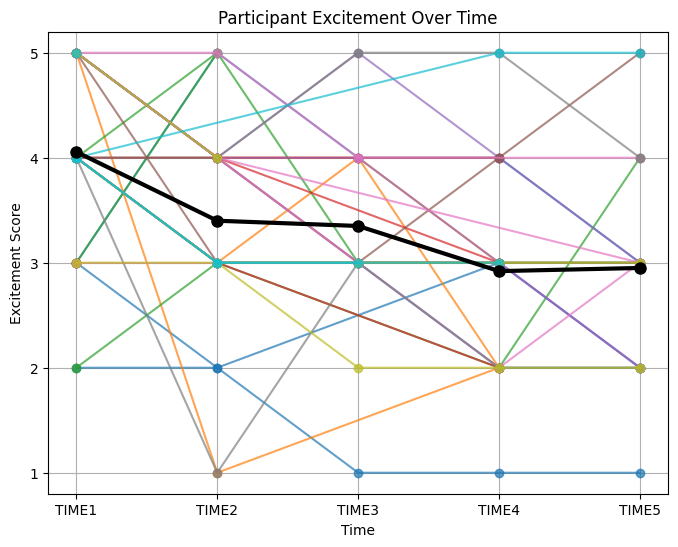

In [26]:
# Load the dataset
df = pd.read_csv("ExcUnpivoted.csv")

# Remove unnecessary unnamed columns if they exist
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Drop missing values
df_clean = df.dropna(subset=["Excitement"])
time_order = ["TIME1", "TIME2", "TIME3", "TIME4", "TIME5"]

summary_stats = df_clean.groupby("Timepoint")["Excitement"].agg(["count", "mean", "std", "min", "max"])
print("\nSummary Statistics:\n", summary_stats)

# Statistical tests
anova_result = stats.f_oneway(
    *[df_clean[df_clean["Timepoint"] == time]["Excitement"].values for time in time_order]
)

print("\nANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.6f}")

pairwise_tests = {}

for i in range(len(time_order) - 1):
    group1 = df_clean[df_clean["Timepoint"] == time_order[i]]["Excitement"]
    group2 = df_clean[df_clean["Timepoint"] == time_order[i + 1]]["Excitement"]

    if len(group1) > 1 and len(group2) > 1:  # Ensure enough data for testing
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
        pairwise_tests[f"{time_order[i]} vs {time_order[i+1]}"] = (t_stat, p_value)

print("\nPairwise T-Test Results:")
for comparison, (t_stat, p_value) in pairwise_tests.items():
    significance = "✅ Significant" if p_value < 0.05 else "❌ Not Significant"
    print(f"{comparison}: p-value = {p_value:.6f} ({significance})")


# statistical significance of overall trend  
group1 = df_clean[df_clean["Timepoint"] == "TIME1"]["Excitement"]
group5 = df_clean[df_clean["Timepoint"] == "TIME5"]["Excitement"]

t_stat_overall, p_value_overall = stats.ttest_ind(group1, group5, equal_var=False)

print("\nOverall Trend (TIME1 vs TIME5):")
significance = "✅ Significant" if p_value_overall < 0.05 else "❌ Not Significant"
print(f"TIME1 vs TIME5: p-value = {p_value_overall:.6f} ({significance})")

# Create the plot to display 
mean_exc_clean = df_clean.groupby("Timepoint")["Excitement"].mean()

unique_participants_clean = df_clean["Participant"].unique()
colors_clean = plt.cm.tab10(np.linspace(0, 1, len(unique_participants_clean)))

plt.figure(figsize=(8, 6))

for participant, color in zip(unique_participants_clean, colors_clean):
    data = df_clean[df_clean["Participant"] == participant]
    plt.plot(data["Timepoint"], data["Excitement"], marker="o", linestyle="-", alpha=0.7, color=color, label=participant)

plt.plot(time_order, mean_exc_clean[time_order], color="black", linewidth=3, marker="o", markersize=8, label="Trend Line")

plt.xticks(time_order, time_order)
plt.yticks(range(int(df_clean["Excitement"].min()), int(df_clean["Excitement"].max()) + 1, 1))
plt.xlabel("Time")
plt.ylabel("Excitement Score")
plt.title("Participant Excitement Over Time")
plt.grid(True)

plt.show()



Summary Statistics:
            count      mean       std  min  max
Timepoint                                     
TIME1         36  3.972222  1.055221  1.0  5.0
TIME2         30  3.900000  1.028893  1.0  5.0
TIME3         19  3.526316  0.964274  2.0  5.0
TIME4         25  3.320000  1.144552  1.0  5.0
TIME5         20  3.400000  1.231174  1.0  5.0

ANOVA Test Results:
F-statistic: 2.0844, p-value: 0.086744

Pairwise T-Test Results:
TIME1 vs TIME2: p-value = 0.779898 (❌ Not Significant)
TIME2 vs TIME3: p-value = 0.205227 (❌ Not Significant)
TIME3 vs TIME4: p-value = 0.520486 (❌ Not Significant)
TIME4 vs TIME5: p-value = 0.824345 (❌ Not Significant)

Overall Trend (TIME1 vs TIME5):
TIME1 vs TIME5: p-value = 0.088711 (❌ Not Significant)


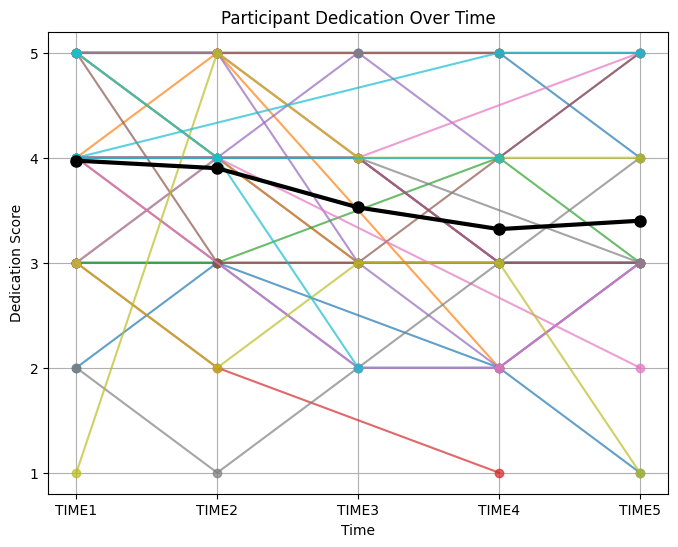

In [27]:
# Load the dataset
df = pd.read_csv("DedUnpivoted.csv")

# Remove unnecessary unnamed columns if they exist
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Drop missing values 
df_clean = df.dropna(subset=["Dedication"])
time_order = ["TIME1", "TIME2", "TIME3", "TIME4", "TIME5"]

summary_stats = df_clean.groupby("Timepoint")["Dedication"].agg(["count", "mean", "std", "min", "max"])
print("\nSummary Statistics:\n", summary_stats)

# Statistical tests
anova_result = stats.f_oneway(
    *[df_clean[df_clean["Timepoint"] == time]["Dedication"].values for time in time_order]
)

print("\nANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.6f}")

pairwise_tests = {}

for i in range(len(time_order) - 1):
    group1 = df_clean[df_clean["Timepoint"] == time_order[i]]["Dedication"]
    group2 = df_clean[df_clean["Timepoint"] == time_order[i + 1]]["Dedication"]

    if len(group1) > 1 and len(group2) > 1:  # Ensure enough data for testing
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
        pairwise_tests[f"{time_order[i]} vs {time_order[i+1]}"] = (t_stat, p_value)

print("\nPairwise T-Test Results:")
for comparison, (t_stat, p_value) in pairwise_tests.items():
    significance = "✅ Significant" if p_value < 0.05 else "❌ Not Significant"
    print(f"{comparison}: p-value = {p_value:.6f} ({significance})")


# statistical significance of overall trend  
group1 = df_clean[df_clean["Timepoint"] == "TIME1"]["Dedication"]
group5 = df_clean[df_clean["Timepoint"] == "TIME5"]["Dedication"]

t_stat_overall, p_value_overall = stats.ttest_ind(group1, group5, equal_var=False)

print("\nOverall Trend (TIME1 vs TIME5):")
significance = "✅ Significant" if p_value_overall < 0.05 else "❌ Not Significant"
print(f"TIME1 vs TIME5: p-value = {p_value_overall:.6f} ({significance})")

# Create the plot to display 
mean_exc_clean = df_clean.groupby("Timepoint")["Dedication"].mean()

unique_participants_clean = df_clean["Participant"].unique()
colors_clean = plt.cm.tab10(np.linspace(0, 1, len(unique_participants_clean)))

plt.figure(figsize=(8, 6))

for participant, color in zip(unique_participants_clean, colors_clean):
    data = df_clean[df_clean["Participant"] == participant]
    plt.plot(data["Timepoint"], data["Dedication"], marker="o", linestyle="-", alpha=0.7, color=color, label=participant)

plt.plot(time_order, mean_exc_clean[time_order], color="black", linewidth=3, marker="o", markersize=8, label="Trend Line")

plt.xticks(time_order, time_order)
plt.yticks(range(int(df_clean["Dedication"].min()), int(df_clean["Dedication"].max()) + 1, 1))
plt.xlabel("Time")
plt.ylabel("Dedication Score")
plt.title("Participant Dedication Over Time")
plt.grid(True)

plt.show()



Summary Statistics:
            count      mean       std  min  max
Timepoint                                     
TIME2         30  3.533333  1.041661  1.0  5.0
TIME3         19  3.421053  0.901591  2.0  5.0
TIME4         25  3.120000  1.092398  1.0  5.0
TIME5         20  3.100000  1.209611  1.0  5.0

ANOVA Test Results:
F-statistic: 1.0284, p-value: 0.383954

Pairwise T-Test Results:
TIME2 vs TIME3: p-value = 0.691454 (❌ Not Significant)
TIME3 vs TIME4: p-value = 0.322774 (❌ Not Significant)
TIME4 vs TIME5: p-value = 0.954425 (❌ Not Significant)

Overall Trend (TIME2 vs TIME5):
TIME1 vs TIME5: p-value = 0.198174 (❌ Not Significant)


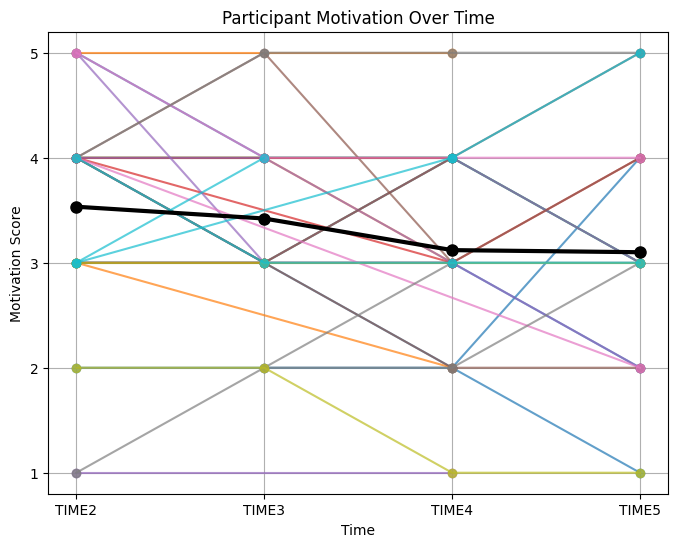

In [28]:
# Load the dataset
df = pd.read_csv("MotUnpivoted.csv")

# Remove unnecessary unnamed columns if they exist
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Drop missing values 
df_clean = df.dropna(subset=["Motivation"])
time_order = ["TIME2", "TIME3", "TIME4", "TIME5"]

summary_stats = df_clean.groupby("Timepoint")["Motivation"].agg(["count", "mean", "std", "min", "max"])
print("\nSummary Statistics:\n", summary_stats)

# Statistical tests
anova_result = stats.f_oneway(
    *[df_clean[df_clean["Timepoint"] == time]["Motivation"].values for time in time_order]
)

print("\nANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.6f}")

pairwise_tests = {}

for i in range(len(time_order) - 1):
    group1 = df_clean[df_clean["Timepoint"] == time_order[i]]["Motivation"]
    group2 = df_clean[df_clean["Timepoint"] == time_order[i + 1]]["Motivation"]

    if len(group1) > 1 and len(group2) > 1:  # Ensure enough data for testing
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
        pairwise_tests[f"{time_order[i]} vs {time_order[i+1]}"] = (t_stat, p_value)

print("\nPairwise T-Test Results:")
for comparison, (t_stat, p_value) in pairwise_tests.items():
    significance = "✅ Significant" if p_value < 0.05 else "❌ Not Significant"
    print(f"{comparison}: p-value = {p_value:.6f} ({significance})")


# statistical significance of overall trend  
group1 = df_clean[df_clean["Timepoint"] == "TIME2"]["Motivation"]
group5 = df_clean[df_clean["Timepoint"] == "TIME5"]["Motivation"]

t_stat_overall, p_value_overall = stats.ttest_ind(group1, group5, equal_var=False)

print("\nOverall Trend (TIME2 vs TIME5):")
significance = "✅ Significant" if p_value_overall < 0.05 else "❌ Not Significant"
print(f"TIME1 vs TIME5: p-value = {p_value_overall:.6f} ({significance})")

# Create the plot to display 
mean_exc_clean = df_clean.groupby("Timepoint")["Motivation"].mean()

unique_participants_clean = df_clean["Participant"].unique()
colors_clean = plt.cm.tab10(np.linspace(0, 1, len(unique_participants_clean)))

plt.figure(figsize=(8, 6))

for participant, color in zip(unique_participants_clean, colors_clean):
    data = df_clean[df_clean["Participant"] == participant]
    plt.plot(data["Timepoint"], data["Motivation"], marker="o", linestyle="-", alpha=0.7, color=color, label=participant)

plt.plot(time_order, mean_exc_clean[time_order], color="black", linewidth=3, marker="o", markersize=8, label="Trend Line")

plt.xticks(time_order, time_order)
plt.yticks(range(int(df_clean["Motivation"].min()), int(df_clean["Motivation"].max()) + 1, 1))
plt.xlabel("Time")
plt.ylabel("Motivation Score")
plt.title("Participant Motivation Over Time")
plt.grid(True)

plt.show()


Summary Statistics:
            count      mean       std  min  max
Timepoint                                     
TIME2         30  3.100000  1.241523  1.0  5.0
TIME3         19  2.631579  1.382852  1.0  5.0
TIME4         25  3.000000  1.290994  1.0  5.0
TIME5         20  3.000000  1.414214  1.0  5.0

ANOVA Test Results:
F-statistic: 0.5172, p-value: 0.671500

Pairwise T-Test Results:
TIME2 vs TIME3: p-value = 0.237594 (❌ Not Significant)
TIME3 vs TIME4: p-value = 0.373508 (❌ Not Significant)
TIME4 vs TIME5: p-value = 1.000000 (❌ Not Significant)

Overall Trend (TIME2 vs TIME5):
TIME1 vs TIME5: p-value = 0.798583 (❌ Not Significant)


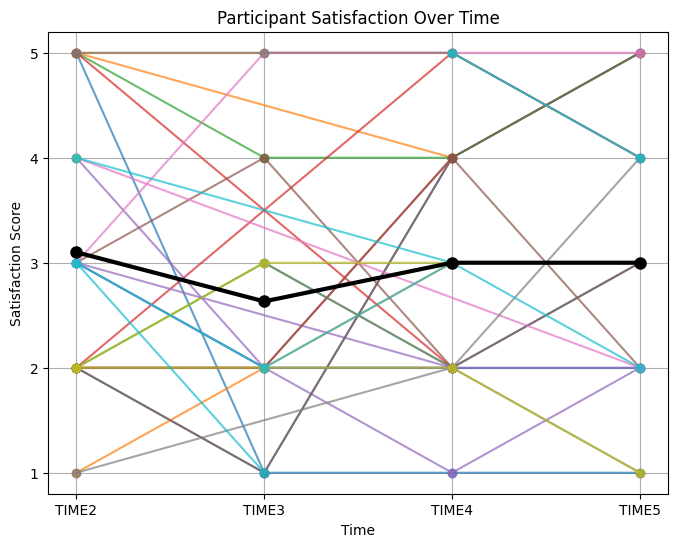

In [29]:
# Load the dataset
df = pd.read_csv("SatUnpivoted.csv")

# Remove unnecessary unnamed columns if they exist
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Drop missing values 
df_clean = df.dropna(subset=["Satisfaction"])
time_order = ["TIME2", "TIME3", "TIME4", "TIME5"]

summary_stats = df_clean.groupby("Timepoint")["Satisfaction"].agg(["count", "mean", "std", "min", "max"])
print("\nSummary Statistics:\n", summary_stats)

# Statistical tests
anova_result = stats.f_oneway(
    *[df_clean[df_clean["Timepoint"] == time]["Satisfaction"].values for time in time_order]
)

print("\nANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.6f}")

pairwise_tests = {}

for i in range(len(time_order) - 1):
    group1 = df_clean[df_clean["Timepoint"] == time_order[i]]["Satisfaction"]
    group2 = df_clean[df_clean["Timepoint"] == time_order[i + 1]]["Satisfaction"]

    if len(group1) > 1 and len(group2) > 1:  # Ensure enough data for testing
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
        pairwise_tests[f"{time_order[i]} vs {time_order[i+1]}"] = (t_stat, p_value)

print("\nPairwise T-Test Results:")
for comparison, (t_stat, p_value) in pairwise_tests.items():
    significance = "✅ Significant" if p_value < 0.05 else "❌ Not Significant"
    print(f"{comparison}: p-value = {p_value:.6f} ({significance})")


# statistical significance of overall trend  
group1 = df_clean[df_clean["Timepoint"] == "TIME2"]["Satisfaction"]
group5 = df_clean[df_clean["Timepoint"] == "TIME5"]["Satisfaction"]

t_stat_overall, p_value_overall = stats.ttest_ind(group1, group5, equal_var=False)

print("\nOverall Trend (TIME2 vs TIME5):")
significance = "✅ Significant" if p_value_overall < 0.05 else "❌ Not Significant"
print(f"TIME1 vs TIME5: p-value = {p_value_overall:.6f} ({significance})")

# Create the plot to display 
mean_exc_clean = df_clean.groupby("Timepoint")["Satisfaction"].mean()

unique_participants_clean = df_clean["Participant"].unique()
colors_clean = plt.cm.tab10(np.linspace(0, 1, len(unique_participants_clean)))

plt.figure(figsize=(8, 6))

for participant, color in zip(unique_participants_clean, colors_clean):
    data = df_clean[df_clean["Participant"] == participant]
    plt.plot(data["Timepoint"], data["Satisfaction"], marker="o", linestyle="-", alpha=0.7, color=color, label=participant)

plt.plot(time_order, mean_exc_clean[time_order], color="black", linewidth=3, marker="o", markersize=8, label="Trend Line")

plt.xticks(time_order, time_order)
plt.yticks(range(int(df_clean["Satisfaction"].min()), int(df_clean["Satisfaction"].max()) + 1, 1))
plt.xlabel("Time")
plt.ylabel("Satisfaction Score")
plt.title("Participant Satisfaction Over Time")
plt.grid(True)

plt.show()


Summary Statistics:
            count      mean       std  min  max
Timepoint                                     
TIME2         30  3.266667  1.229896  1.0  5.0
TIME3         19  2.842105  1.258887  1.0  5.0
TIME4         25  3.120000  1.268858  1.0  5.0
TIME5         20  3.050000  1.468081  1.0  5.0

ANOVA Test Results:
F-statistic: 0.4254, p-value: 0.735232

Pairwise T-Test Results:
TIME2 vs TIME3: p-value = 0.253111 (❌ Not Significant)
TIME3 vs TIME4: p-value = 0.474099 (❌ Not Significant)
TIME4 vs TIME5: p-value = 0.866928 (❌ Not Significant)

Overall Trend (TIME2 vs TIME5):
TIME1 vs TIME5: p-value = 0.589292 (❌ Not Significant)


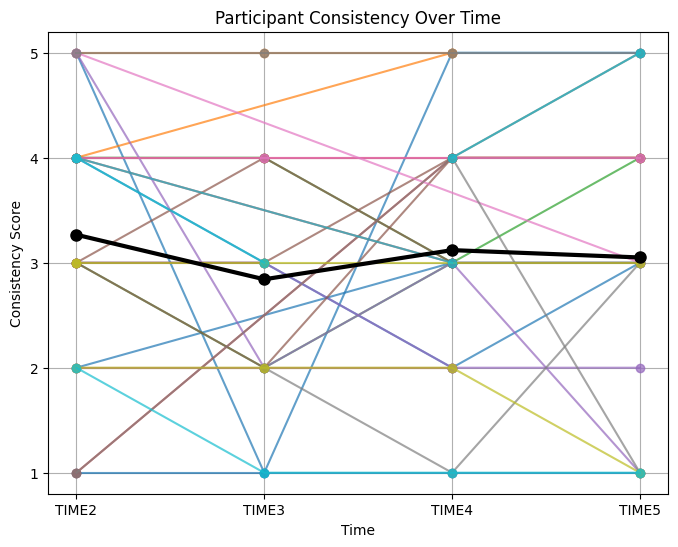

In [30]:
# Load the dataset
df = pd.read_csv("ConUnpivoted.csv")

# Remove unnecessary unnamed columns if they exist
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Drop missing values 
df_clean = df.dropna(subset=["Consistency"])
time_order = ["TIME2", "TIME3", "TIME4", "TIME5"]

summary_stats = df_clean.groupby("Timepoint")["Consistency"].agg(["count", "mean", "std", "min", "max"])
print("\nSummary Statistics:\n", summary_stats)

# Statistical tests
anova_result = stats.f_oneway(
    *[df_clean[df_clean["Timepoint"] == time]["Consistency"].values for time in time_order]
)

print("\nANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.6f}")

pairwise_tests = {}

for i in range(len(time_order) - 1):
    group1 = df_clean[df_clean["Timepoint"] == time_order[i]]["Consistency"]
    group2 = df_clean[df_clean["Timepoint"] == time_order[i + 1]]["Consistency"]

    if len(group1) > 1 and len(group2) > 1:  # Ensure enough data for testing
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
        pairwise_tests[f"{time_order[i]} vs {time_order[i+1]}"] = (t_stat, p_value)

print("\nPairwise T-Test Results:")
for comparison, (t_stat, p_value) in pairwise_tests.items():
    significance = "✅ Significant" if p_value < 0.05 else "❌ Not Significant"
    print(f"{comparison}: p-value = {p_value:.6f} ({significance})")


# statistical significance of overall trend  
group1 = df_clean[df_clean["Timepoint"] == "TIME2"]["Consistency"]
group5 = df_clean[df_clean["Timepoint"] == "TIME5"]["Consistency"]

t_stat_overall, p_value_overall = stats.ttest_ind(group1, group5, equal_var=False)

print("\nOverall Trend (TIME2 vs TIME5):")
significance = "✅ Significant" if p_value_overall < 0.05 else "❌ Not Significant"
print(f"TIME1 vs TIME5: p-value = {p_value_overall:.6f} ({significance})")

# Create the plot to display 
mean_exc_clean = df_clean.groupby("Timepoint")["Consistency"].mean()

unique_participants_clean = df_clean["Participant"].unique()
colors_clean = plt.cm.tab10(np.linspace(0, 1, len(unique_participants_clean)))

plt.figure(figsize=(8, 6))

for participant, color in zip(unique_participants_clean, colors_clean):
    data = df_clean[df_clean["Participant"] == participant]
    plt.plot(data["Timepoint"], data["Consistency"], marker="o", linestyle="-", alpha=0.7, color=color, label=participant)

plt.plot(time_order, mean_exc_clean[time_order], color="black", linewidth=3, marker="o", markersize=8, label="Trend Line")

plt.xticks(time_order, time_order)
plt.yticks(range(int(df_clean["Consistency"].min()), int(df_clean["Consistency"].max()) + 1, 1))
plt.xlabel("Time")
plt.ylabel("Consistency Score")
plt.title("Participant Consistency Over Time")
plt.grid(True)

plt.show()


Summary Statistics:
            count      mean       std  min  max
Timepoint                                     
TIME2         30  3.200000  0.961321  1.0  5.0
TIME3         19  2.947368  0.911268  1.0  4.0
TIME4         25  2.920000  1.115049  1.0  5.0
TIME5         20  2.800000  1.239694  1.0  5.0

ANOVA Test Results:
F-statistic: 0.6554, p-value: 0.581615

Pairwise T-Test Results:
TIME2 vs TIME3: p-value = 0.360255 (❌ Not Significant)
TIME3 vs TIME4: p-value = 0.929086 (❌ Not Significant)
TIME4 vs TIME5: p-value = 0.737718 (❌ Not Significant)

Overall Trend (TIME2 vs TIME5):
TIME1 vs TIME5: p-value = 0.231241 (❌ Not Significant)


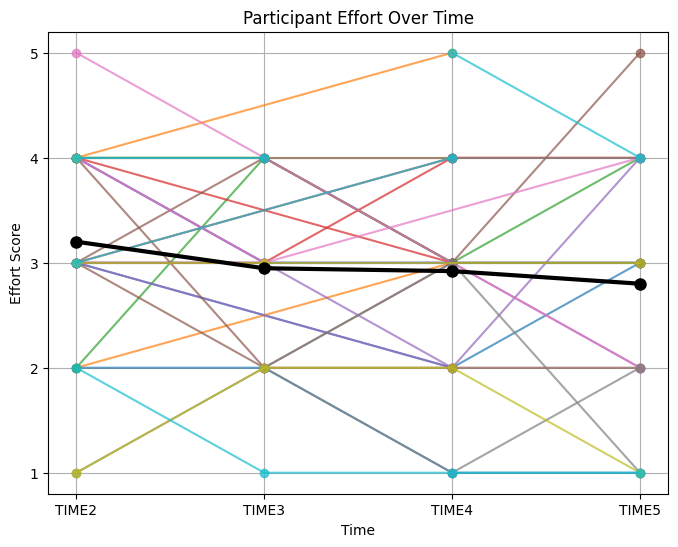

In [31]:
# Load the dataset
df = pd.read_csv("EffUnpivoted.csv")

# Remove unnecessary unnamed columns if they exist
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Drop missing values 
df_clean = df.dropna(subset=["Effort"])
time_order = ["TIME2", "TIME3", "TIME4", "TIME5"]

summary_stats = df_clean.groupby("Timepoint")["Effort"].agg(["count", "mean", "std", "min", "max"])
print("\nSummary Statistics:\n", summary_stats)

# Statistical tests
anova_result = stats.f_oneway(
    *[df_clean[df_clean["Timepoint"] == time]["Effort"].values for time in time_order]
)

print("\nANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.6f}")

pairwise_tests = {}

for i in range(len(time_order) - 1):
    group1 = df_clean[df_clean["Timepoint"] == time_order[i]]["Effort"]
    group2 = df_clean[df_clean["Timepoint"] == time_order[i + 1]]["Effort"]

    if len(group1) > 1 and len(group2) > 1:  # Ensure enough data for testing
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
        pairwise_tests[f"{time_order[i]} vs {time_order[i+1]}"] = (t_stat, p_value)

print("\nPairwise T-Test Results:")
for comparison, (t_stat, p_value) in pairwise_tests.items():
    significance = "✅ Significant" if p_value < 0.05 else "❌ Not Significant"
    print(f"{comparison}: p-value = {p_value:.6f} ({significance})")


# statistical significance of overall trend  
group1 = df_clean[df_clean["Timepoint"] == "TIME2"]["Effort"]
group5 = df_clean[df_clean["Timepoint"] == "TIME5"]["Effort"]

t_stat_overall, p_value_overall = stats.ttest_ind(group1, group5, equal_var=False)

print("\nOverall Trend (TIME2 vs TIME5):")
significance = "✅ Significant" if p_value_overall < 0.05 else "❌ Not Significant"
print(f"TIME1 vs TIME5: p-value = {p_value_overall:.6f} ({significance})")

# Create the plot to display 
mean_exc_clean = df_clean.groupby("Timepoint")["Effort"].mean()

unique_participants_clean = df_clean["Participant"].unique()
colors_clean = plt.cm.tab10(np.linspace(0, 1, len(unique_participants_clean)))

plt.figure(figsize=(8, 6))

for participant, color in zip(unique_participants_clean, colors_clean):
    data = df_clean[df_clean["Participant"] == participant]
    plt.plot(data["Timepoint"], data["Effort"], marker="o", linestyle="-", alpha=0.7, color=color, label=participant)

plt.plot(time_order, mean_exc_clean[time_order], color="black", linewidth=3, marker="o", markersize=8, label="Trend Line")

plt.xticks(time_order, time_order)
plt.yticks(range(int(df_clean["Effort"].min()), int(df_clean["Effort"].max()) + 1, 1))
plt.xlabel("Time")
plt.ylabel("Effort Score")
plt.title("Participant Effort Over Time")
plt.grid(True)

plt.show()

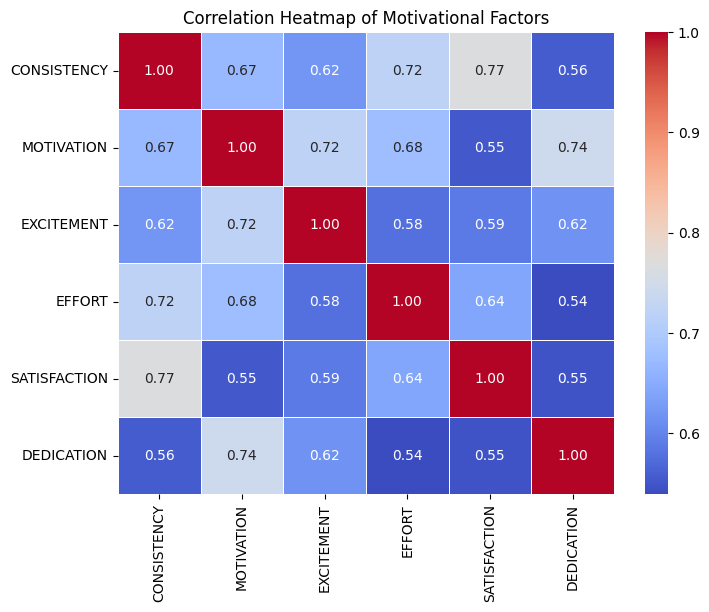

In [14]:
df = pd.read_csv("CorrelationMap.csv")

selected_columns = ["CONSISTENCY", "MOTIVATION", "EXCITEMENT", "EFFORT", "SATISFACTION", "DEDICATION"]
correlation_matrix_selected = df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Motivational Factors")
plt.show()


<Figure size 1200x600 with 0 Axes>

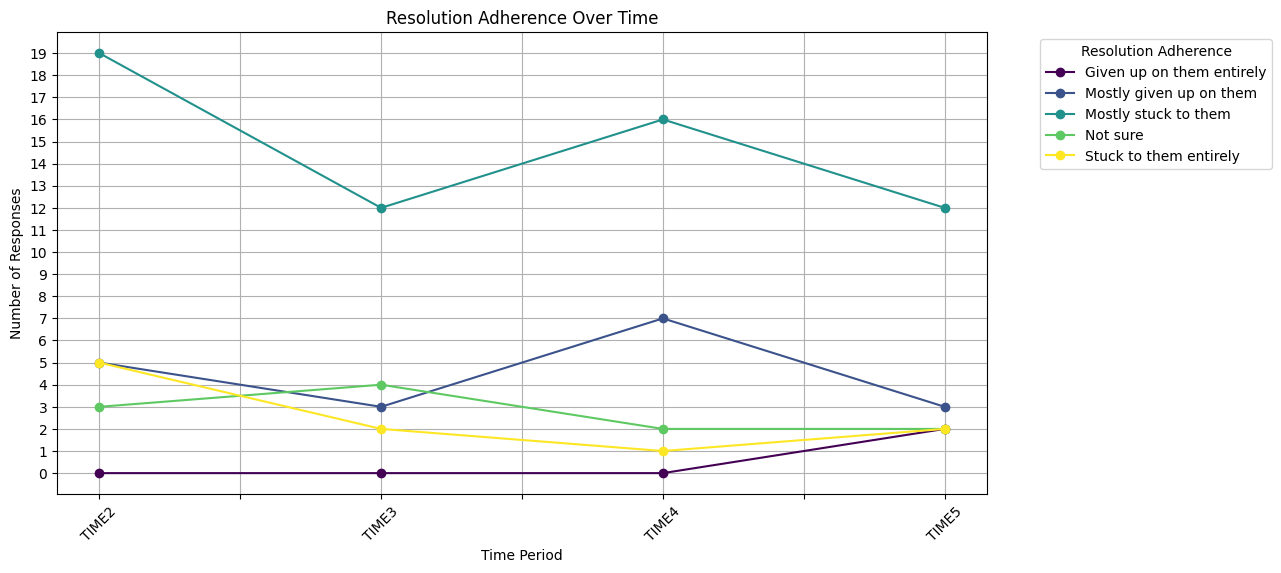

In [18]:

df_new = pd.read_csv("ResAdherence.csv")

df_long = df_new.melt(var_name="Time Period", value_name="Resolution Adherence")

resolution_time_series_new = df_long.groupby(["Time Period", "Resolution Adherence"]).size().unstack(fill_value=0)

all_categories = [
    "Given up on them entirely",
    "Mostly given up on them",
    "Mostly stuck to them",
    "Not sure",
    "Stuck to them entirely"
]

resolution_time_series_new = resolution_time_series_new.reindex(columns=all_categories, fill_value=0)

plt.figure(figsize=(12, 6))
ax = resolution_time_series_new.plot(kind="line", marker="o", figsize=(12, 6), colormap="viridis")

plt.xlabel("Time Period")
plt.ylabel("Number of Responses")
plt.title("Resolution Adherence Over Time")

y_max = resolution_time_series_new.max().max()
plt.yticks(np.arange(0, y_max + 1, 1))

plt.xticks(rotation=45)
plt.legend(title="Resolution Adherence", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

plt.show()